
# Demonstrating the different strategies of KBinsDiscretizer

This example presents the different strategies implemented in KBinsDiscretizer:

- 'uniform': The discretization is uniform in each feature, which means that
  the bin widths are constant in each dimension.
- quantile': The discretization is done on the quantiled values, which means
  that each bin has approximately the same number of samples.
- 'kmeans': The discretization is based on the centroids of a KMeans clustering
  procedure.

The plot shows the regions where the discretized encoding is constant.


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.


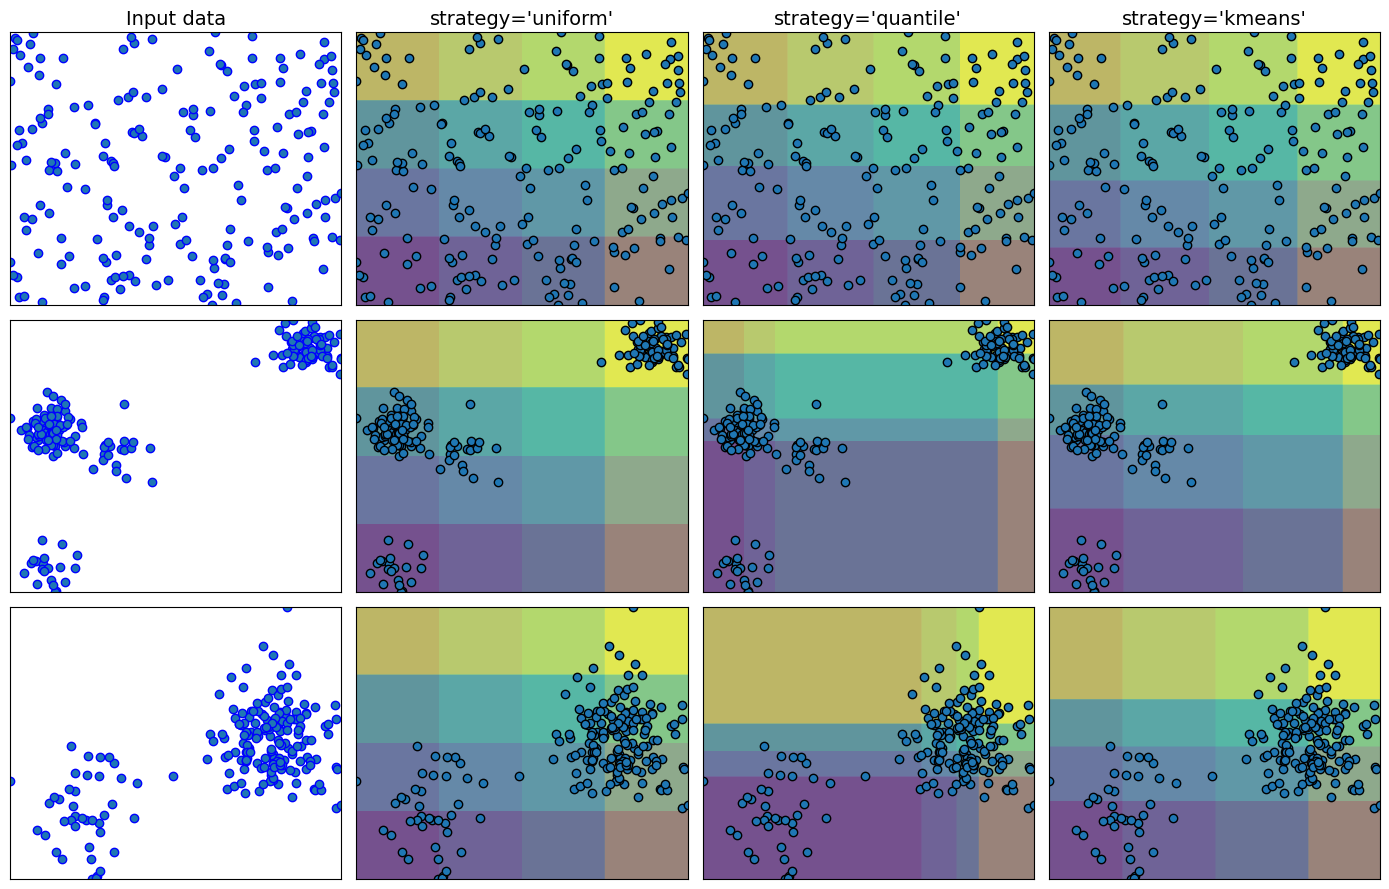

In [24]:
# Author: Tom Dupré la Tour
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer

strategies = ["uniform", "quantile", "kmeans"]

n_samples = 200
centers_0 = np.array([[0, 0], [0, 5], [2, 4], [8, 8]])
centers_1 = np.array([[0, 0], [3, 1]])

# construct the datasets
random_state = 42
X_list = [
    np.random.RandomState(random_state).uniform(-3, 3, size=(n_samples, 2)),
    make_blobs(
        n_samples=[
            n_samples // 10,
            n_samples * 4 // 10,
            n_samples // 10,
            n_samples * 4 // 10,
        ],
        cluster_std=0.5,
        centers=centers_0,
        random_state=random_state,
    )[0],
    make_blobs(
        n_samples=[n_samples // 5, n_samples * 4 // 5],
        cluster_std=0.5,
        centers=centers_1,
        random_state=random_state,
    )[0],
]

figure = plt.figure(figsize=(14, 9))
i = 1
for ds_cnt, X in enumerate(X_list):
    ax = plt.subplot(len(X_list), len(strategies) + 1, i)
    ax.scatter(X[:, 0], X[:, 1], edgecolors="b")
    if ds_cnt == 0:
        ax.set_title("Input data", size=14)

    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 300),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 300),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1
    # transform the dataset with KBinsDiscretizer
    for strategy in strategies:
        enc = KBinsDiscretizer(n_bins=4, encode="ordinal", strategy=strategy)
        enc.fit(X)
        grid_encoded = enc.transform(grid)

        ax = plt.subplot(len(X_list), len(strategies) + 1, i)

        # horizontal stripes
        horizontal = grid_encoded[:, 0].reshape(xx.shape)
        ax.contourf(xx, yy, horizontal, alpha=0.5)
        # vertical stripes
        vertical = grid_encoded[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, vertical, alpha=0.5)

        ax.scatter(X[:, 0], X[:, 1], edgecolors="k")
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title("strategy='%s'" % (strategy,), size=14)

        i += 1

plt.tight_layout()
plt.show()

### KBinsDiscretizer with KMeans Strategy

#### Concept

`KBinsDiscretizer` is a transformation tool in scikit-learn that bins continuous data into discrete intervals. When using the "kmeans" strategy, it employs the K-Means clustering algorithm to define the bin edges.

#### Mathematical Background

**K-Means Clustering**:
K-Means clustering aims to partition the data into $\ k  $ clusters, where each data point belongs to the cluster with the nearest mean (centroid).

For a dataset $\ X  $ with $\ n  $ samples and $\ m  $ features, the objective of K-Means is to minimize the within-cluster sum of squares (WCSS):

$\
\text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \|\vec{x} - \vec{\mu}_i\|^2
$

where:
- $\ C_i  $ is the set of points in cluster $\ i  $.
- $\ \vec{\mu}_i  $ is the centroid of cluster $\ i  $.
- $\\|\vec{x} - \vec{\mu}_i\|^2 $ is the Euclidean distance between a point $\\vec{x} $ and the centroid $\\vec{\mu}_i $.

**Steps of K-Means Algorithm**:
1. **Initialization**: Randomly select $\ k  $ initial centroids.
2. **Assignment**: Assign each point to the nearest centroid.
3. **Update**: Compute new centroids as the mean of all points assigned to each cluster.
4. **Repeat**: Repeat steps 2 and 3 until convergence (centroids do not change significantly).

**Binning with KMeans Strategy**:
After applying K-Means clustering, the bin edges are determined by the cluster centroids.

For a feature vector $\ \vec{x}  $, the steps are as follows:
1. **Fit K-Means**: Apply K-Means clustering to the feature.
2. **Determine Bin Edges**: Use the cluster centroids to define the bin edges.
3. **Transform Data**: Assign each data point to the nearest centroid (bin).

#### Example with Two Features

Consider a dataset $\ X  $ with two features:

$\
X = \begin{pmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22} \\
\vdots & \vdots \\
x_{n1} & x_{n2}
\end{pmatrix}
$

Let’s apply `KBinsDiscretizer` with the KMeans strategy to discretize each feature into $\ k  $ bins.

1. **Initialization**:
   - Choose the number of bins $\ k  $.
   - Initialize $\ k  $ centroids for each feature separately.

2. **Fit K-Means for Feature 1**:
   - Apply K-Means to the first feature $\ \vec{x}_1 = (x_{11}, x_{21}, \ldots, x_{n1})  $.
   - Compute centroids $\ \vec{\mu}_1, \vec{\mu}_2, \ldots, \vec{\mu}_k  $.

3. **Fit K-Means for Feature 2**:
   - Apply K-Means to the second feature $\ \vec{x}_2 = (x_{12}, x_{22}, \ldots, x_{n2})  $.
   - Compute centroids $\ \vec{\mu}_1, \vec{\mu}_2, \ldots, \vec{\mu}_k  $.

4. **Determine Bin Edges**:
   - For each feature, the bin edges are determined by the centroids obtained from K-Means clustering.

5. **Transform Data**:
   - Assign each data point to the nearest centroid (bin) for each feature.

#### Handling Two Features

When `KBinsDiscretizer` is applied to a dataset with two features, it independently applies the binning strategy to each feature. Thus, for a given data point $\ (x_{i1}, x_{i2})  $:
- $\ x_{i1}  $ is binned based on the centroids of the first feature.
- $\ x
